##### Student Name: Nayem Alam
##### Student ID  : 260743549
##### Assignment 1

## Part 2.1
    Q. 1

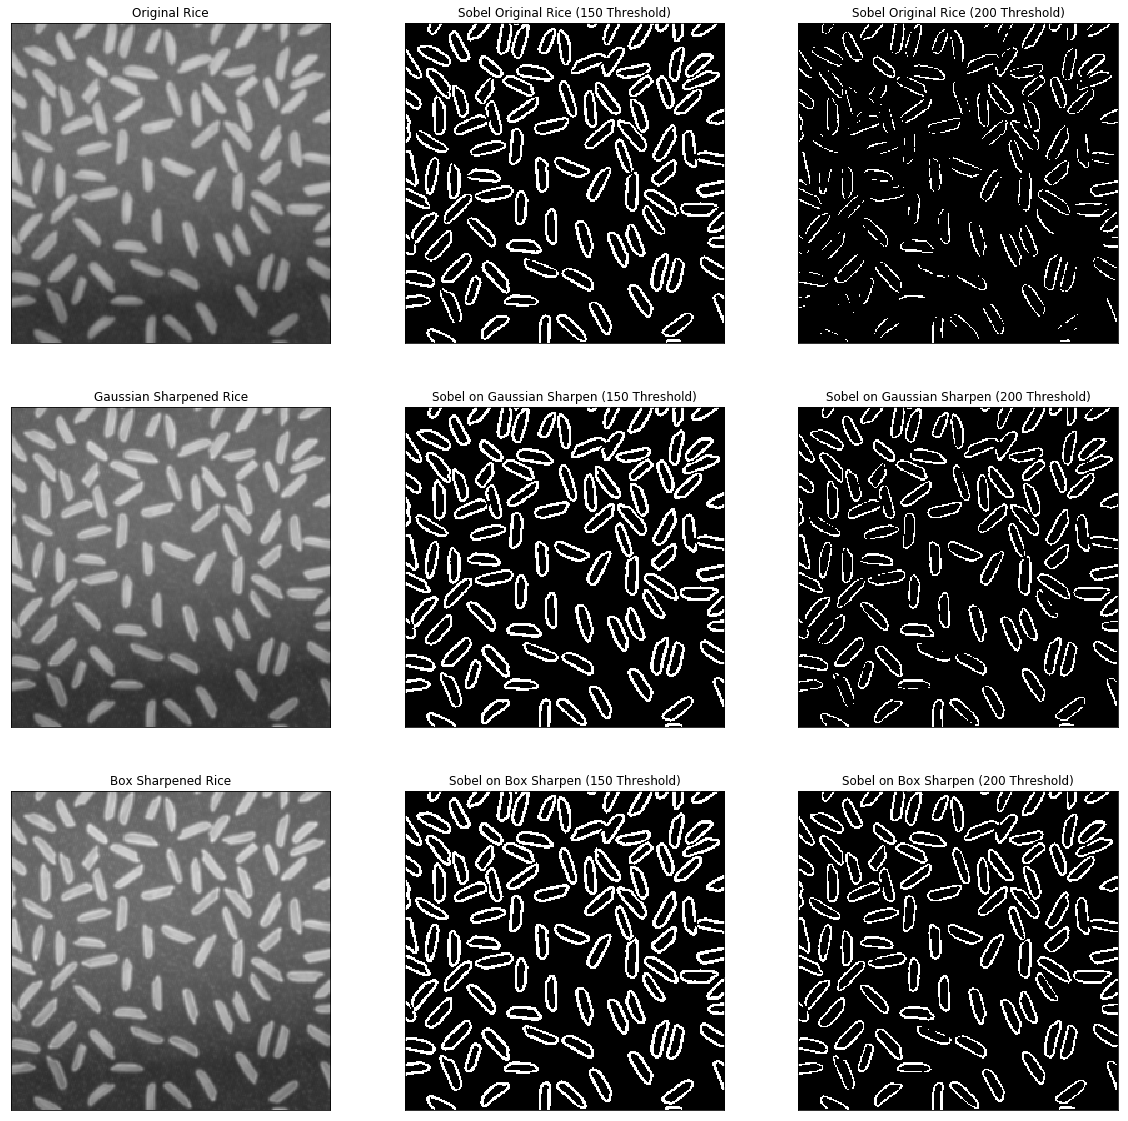

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import data, io, filters
import math

# --- Part 2.1: Q. 1 ---
rice_img = "./rice.png"
img = cv2.imread(rice_img)
rice_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# set threshold
THRESH_150 = 150
THRESH_200 = 200

# filter image using 5x5 Gaussian
img_gaussian = cv2.GaussianBlur(img, (5,5), math.sqrt(2))

# box filter image using 5x5
img_box = cv2.blur(img,(5,5))

# sharpen images
g_details = cv2.subtract(img, img_gaussian)
b_details = cv2.subtract(img, img_box)
g_sharpened = cv2.add(img, g_details)
b_sharpened = cv2.add(img, b_details)

## Sobel Edge

# Original
s_edgex = cv2.Sobel(rice_gray, cv2.CV_64F,1,0,ksize=3)
s_edgey = cv2.Sobel(rice_gray, cv2.CV_64F,0,1,ksize=3)

# Gaussian Sharpened
s_edge_gsharpenedx = cv2.Sobel(g_sharpened, cv2.CV_64F,1,0,ksize=3)
s_edge_gsharpenedy = cv2.Sobel(g_sharpened, cv2.CV_64F,0,1,ksize=3)

# Box Sharpened
s_edge_bsharpenedx = cv2.Sobel(b_sharpened, cv2.CV_64F,1,0,ksize=3)
s_edge_bsharpenedy = cv2.Sobel(b_sharpened, cv2.CV_64F,0,1,ksize=3)
# s_edge_bsharpened = s_edge_bsharpenedx + s_edge_bsharpenedy

## Calculate Magnitudes and Phases
rice_m = cv2.magnitude(s_edgex, s_edgey)
rice_p = cv2.phase(s_edgex, s_edgey)

gsharpened_m = cv2.magnitude(s_edge_gsharpenedx, s_edge_gsharpenedy)
gsharpened_p = cv2.phase(s_edge_gsharpenedx, s_edge_gsharpenedy)

bsharpened_m = cv2.magnitude(s_edge_bsharpenedx, s_edge_bsharpenedy)
bsharpened_p = cv2.phase(s_edge_bsharpenedx, s_edge_bsharpenedy)

# Apply threshold of 150
retval, t = cv2.threshold(rice_m, THRESH_150, 255, cv2.THRESH_BINARY)
retval2, t2 = cv2.threshold(bsharpened_m, THRESH_150, 255, cv2.THRESH_BINARY)
retval3, t3 = cv2.threshold(gsharpened_m, THRESH_150, 255, cv2.THRESH_BINARY)

# Apply threshold of 200
retval4, thresh2 = cv2.threshold(rice_m, THRESH_200, 255, cv2.THRESH_BINARY)
retval5, thresh3 = cv2.threshold(bsharpened_m, THRESH_200, 255, cv2.THRESH_BINARY)
retval6, thresh4 = cv2.threshold(gsharpened_m, THRESH_200, 255, cv2.THRESH_BINARY)

# plot
plt.figure(figsize=(20, 20))

plt.subplot(331), plt.imshow(img.astype(np.uint8), cmap="gray")
plt.title("Original Rice"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(t.astype(np.uint8), cmap="gray")
plt.title("Sobel Original Rice (150 Threshold)"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(thresh2.astype(np.uint8), cmap="gray")
plt.title("Sobel Original Rice (200 Threshold)"), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(g_sharpened.astype(np.uint8), cmap="gray")
plt.title("Gaussian Sharpened Rice"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(t3.astype(np.uint8), cmap="gray")
plt.title("Sobel on Gaussian Sharpen (150 Threshold)"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(thresh4.astype(np.uint8), cmap="gray")
plt.title("Sobel on Gaussian Sharpen (200 Threshold)"), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(b_sharpened.astype(np.uint8), cmap="gray")
plt.title("Box Sharpened Rice"), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(t2.astype(np.uint8), cmap="gray")
plt.title("Sobel on Box Sharpen (150 Threshold)"), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(thresh3.astype(np.uint8), cmap="gray")
plt.title("Sobel on Box Sharpen (200 Threshold)"), plt.xticks([]), plt.yticks([])

plt.show()

#print("Simply using edge detection is not enough to detect all object edges. \nIf we sharpen prior to using edge, then we can see more edges and notice: box filter is superior.")

# --- END of Part 2.1: Q. 1 ---

### Section 2,  2.1 - Q.1 Answer (using sharpening prior to the edge):
Simply using edge detection is not enough to detect all object edges. <br>
If we sharpen prior to using edge, then we can see edges more defined. Sobel edge creates an emphasis on the edges, as we can see: the 150 threshold images are more accurate outlining most of the rice bits.

## Part 2.1
    Q. 2

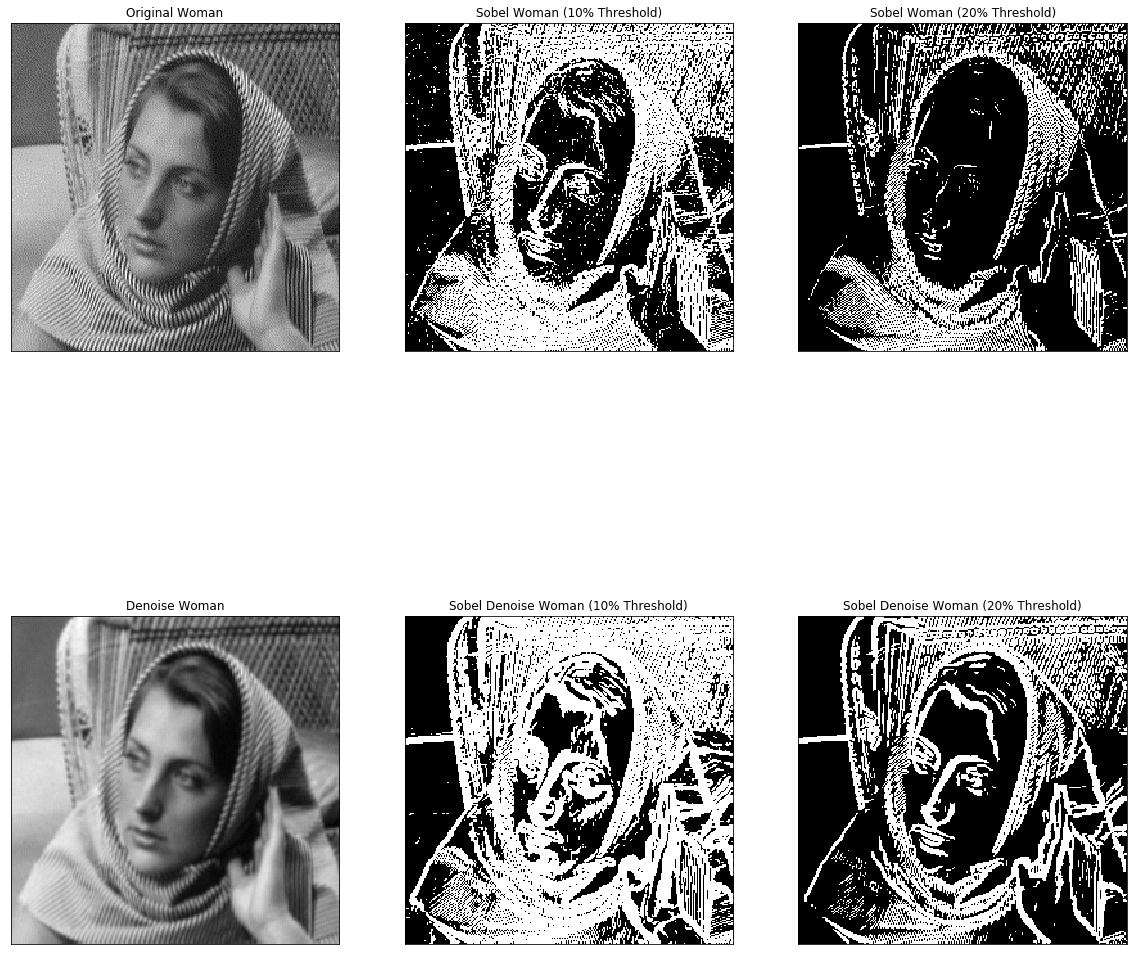

In [12]:
# --- Part 2.1: Q. 2 ---
woman_img = "./woman.png"
img2 = cv2.imread(woman_img)
woman_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

## Denoise w/ Box Filter 3x3
woman_dn = cv2.blur(woman_gray, (3,3)) 

## Sobel
# Original
sedge_womanx = cv2.Sobel(woman_gray, cv2.CV_64F, 1, 0, ksize=3) 
sedge_womany = cv2.Sobel(woman_gray, cv2.CV_64F, 0, 1, ksize=3) 
# Denoised
sedge_womandx = cv2.Sobel(woman_dn, cv2.CV_64F, 1, 0, ksize=3) 
sedge_womandy = cv2.Sobel(woman_dn, cv2.CV_64F, 0, 1, ksize=3) 

## Magnitude and Phase
# Original
woman_m = cv2.magnitude(sedge_womanx, sedge_womany) 
woman_p = cv2.phase(sedge_womanx, sedge_womany) 
# Denoised
womand_m = cv2.magnitude(sedge_womandx, sedge_womandy) 
womand_p = cv2.phase(sedge_womandx, sedge_womandy) 

# set threshold
# Original
maxvalw = np.max(woman_m)
maxt_10 = 0.10* maxvalw  
maxt_20 = 0.20* maxvalw

retval10, woman_t10 = cv2.threshold(woman_m, maxt_10, 255, cv2.THRESH_BINARY) 
retval20, woman_t20 = cv2.threshold(woman_m, maxt_20, 255, cv2.THRESH_BINARY) 

# Denoised
maxvalwd = np.max(womand_m)
maxt_10d = 0.10*maxvalwd
maxt_20d = 0.20*maxvalwd

retval11, womand_t10 = cv2.threshold(womand_m, maxt_10d, 255, cv2.THRESH_BINARY) 
retval21, womand_t20 = cv2.threshold(womand_m, maxt_20d, 255, cv2.THRESH_BINARY) 

# plot

plt.figure(figsize = (20, 20))
plt.subplot(231), plt.imshow(woman_gray, cmap="gray")
plt.title("Original Woman"), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(woman_t10, cmap = "gray")
plt.title("Sobel Woman (10% Threshold)"), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(woman_t20, cmap = "gray")
plt.title("Sobel Woman (20% Threshold)"), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(woman_dn, cmap = "gray")
plt.title("Denoise Woman"), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(womand_t10, cmap = "gray")
plt.title("Sobel Denoise Woman (10% Threshold)"), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(womand_t20, cmap = "gray")
plt.title("Sobel Denoise Woman (20% Threshold)"), plt.xticks([]), plt.yticks([])
plt.show() # to ovverride the "<function matplotlib.pyplot.show(*args, **kw)>"

# --- END of Part 2.1: Q. 2 ---

### Section 2,  2.1 - Q. 2 Answer (using sharpening prior to the edge):
Sobel creates an emphasis on edges by performing a gradient calculation; in doing so, we have more noise. <br>
So, denoising and applying a box filter helps in reducing the amount of noise the sobel edge created. <br>
In this case, we notice that the 20% threshold (denoise and box filter) gets most of the edges and is a much crisper image compared to the original 20% threshold image. 